In [ ]:
from viresclient import set_token
set_token("https://vires.services/ows", set_default=True)
#ZBNcoBOuWLHV4cfjl7HWVEjB0bitMmWE

Setting access token for https://vires.services/ows  ...
Generate a token at https://vires.services/accounts/tokens/
Enter token:··········
Token saved for https://vires.services/ows


In [13]:
# Menginstal library viresclient untuk mengambil data SWARM
#!pip install viresclient
# library yang digunakan
import joblib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
import matplotlib.pyplot as plt
#from viresclient import set_token
from sklearn.utils import resample
#from viresclient import SwarmRequest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Set up request data ke server Swarm
#set_token("https://vires.services/ows", set_default=True)
#request = SwarmRequest()

# Memanggil data dari ketiga satelit SWARM (Alpha, Bravo, dan Charlie)
#request.set_collection(
   # "SW_OPER_IBIATMS_2F",
   # "SW_OPER_MAGA_LR_1B",
    #"SW_OPER_EFIA_LP_1B",
   # "SW_OPER_IBIBTMS_2F",
   # "SW_OPER_MAGB_LR_1B",
   # "SW_OPER_EFIB_LP_1B",
   # "SW_OPER_IBICTMS_2F",
   # "SW_OPER_MAGC_LR_1B",
   # "SW_OPER_EFIC_LP_1B"
   # )



# Memanggil produk yang diinginkan
#request.set_products(
    #measurements=['Ne', 'Bubble_Probability', 'F', 'B_NEC','Bubble_Index'],
    #auxiliaries=['F107','Kp','Longitude', 'Latitude', 'MLT' ],
    #sampling_step="PT10S" #pengambilan data per 10 detik
    #)
#request.set_range_filter(parameter="Latitude", minimum=-45, maximum=45)
#request.set_range_filter(parameter="MLT",minimum=18, maximum=24) #melakukan filter pada data yang diinginkan

# Pengambilan data dati tahun 2018 hingga 2024
#data = request.get_between(
    #dt.datetime(2023, 12, 30),
    #dt.datetime(2024, 12, 30)
    #)

# Mengubah data dalam bentuk CSV
#df = data.as_dataframe() # Konversi data menjadi DataFrame Pandas
#df.to_csv('Data SWARM 2024.csv')

In [14]:
data_1 = pd.read_csv('/content/drive/MyDrive/Data GIT 1/Data SWARM 2018-2020.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/Data GIT 1/Data SWARM 2021-2023.csv')
data_3 = pd.read_csv('/content/drive/MyDrive/Data GIT 1/Data SWARM 2024.csv')
data = pd.concat([data_1, data_2, data_3],ignore_index = True)
data.shape

(8256374, 13)

In [17]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data[(data['F'] > 0) & (data['Bubble_Index'] >= 0)]
parameter_hapus = ['B_NEC']
data = data.drop(columns=[col for col in parameter_hapus if col in data.columns], axis=1)

In [18]:
data.isnull().sum()

,0
Timestamp,0
F,0
Bubble_Index,0
F107,54887
Ne,6975
Latitude,0
Longitude,0
Radius,0
Bubble_Probability,159
MLT,0


In [19]:
data = data.set_index('Timestamp')

In [20]:
data['F107'] = data['F107'].interpolate(method='time')
data['Ne'] = data['Ne'].interpolate(method='time')
data['Bubble_Probability'] = data['Bubble_Probability'].interpolate(method='time')

In [21]:
data.isnull().sum()

,0
F,0
Bubble_Index,0
F107,0
Ne,0
Latitude,0
Longitude,0
Radius,0
Bubble_Probability,0
MLT,0
Kp,0


In [22]:
data

,F,Bubble_Index,F107,Ne,Latitude,Longitude,Radius,Bubble_Probability,MLT,Kp,Spacecraft
Timestamp,,,,,,,,,,,
2018-01-01 00:52:40,21410.7967,0,70.374281,116832.2,-44.900695,-18.026285,6823903.43,0.0,22.563309,2.0,A
2018-01-01 00:52:50,21324.1440,0,70.374096,112810.6,-44.260845,-18.009657,6823865.98,0.0,22.576477,2.0,A
2018-01-01 00:53:00,21245.0320,0,70.373911,111236.9,-43.620949,-17.994286,6823827.71,0.0,22.589655,2.0,A
2018-01-01 00:53:10,21173.2711,0,70.373726,113117.9,-42.981007,-17.980118,6823788.62,0.0,22.602848,2.0,A
2018-01-01 00:53:20,21108.6157,0,70.373541,111329.6,-42.341021,-17.967102,6823748.71,0.0,22.616068,2.0,A
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26 15:54:50,24258.1954,0,221.977150,819198.8,-20.139632,29.997977,6881877.29,0.0,18.048515,1.0,B
2024-11-26 15:55:00,24214.1305,0,221.977369,796902.6,-20.772591,29.984520,6881950.90,0.0,18.038197,1.0,B
2024-11-26 15:55:10,24170.4777,0,221.977589,773104.4,-21.405524,29.971300,6882023.48,0.0,18.027481,1.0,B


In [23]:
data = data.reset_index()
display(data.head())

,Timestamp,F,Bubble_Index,F107,Ne,Latitude,Longitude,Radius,Bubble_Probability,MLT,Kp,Spacecraft
0,2018-01-01 00:52:40,21410.7967,0,70.374281,116832.2,-44.900695,-18.026285,6823903.43,0.0,22.563309,2.0,A
1,2018-01-01 00:52:50,21324.1440,0,70.374096,112810.6,-44.260845,-18.009657,6823865.98,0.0,22.576477,2.0,A
2,2018-01-01 00:53:00,21245.0320,0,70.373911,111236.9,-43.620949,-17.994286,6823827.71,0.0,22.589655,2.0,A
3,2018-01-01 00:53:10,21173.2711,0,70.373726,113117.9,-42.981007,-17.980118,6823788.62,0.0,22.602848,2.0,A
4,2018-01-01 00:53:20,21108.6157,0,70.373541,111329.6,-42.341021,-17.967102,6823748.71,0.0,22.616068,2.0,A


In [24]:
data.isnull().sum()

,0
Timestamp,0
F,0
Bubble_Index,0
F107,0
Ne,0
Latitude,0
Longitude,0
Radius,0
Bubble_Probability,0
MLT,0


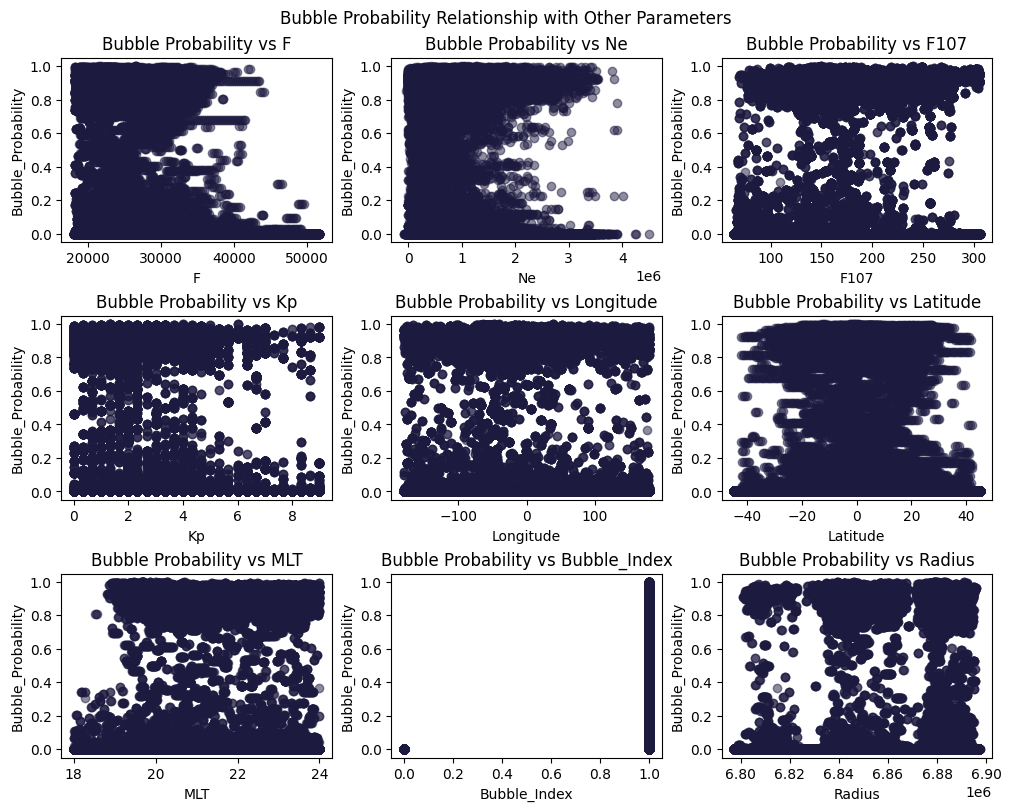

In [26]:
# 'Bubble_Probability' akan menjadi sumbu y di semua plot
parameter = ['F', 'Ne', 'F107', 'Kp', 'Longitude','Latitude', 'MLT','Bubble_Index','Radius']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 8),
                        layout="constrained")
axs = axs.flatten()
for i, param in enumerate(parameter):
    axs[i].scatter(data[param], data['Bubble_Probability'], alpha=0.5, color='#1d1a40') # Cream color
    axs[i].set_title(f'Bubble Probability vs {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Bubble_Probability')

fig.suptitle('Bubble Probability Relationship with Other Parameters')
plt.show()

In [ ]:
data.columns

Index(['Timestamp', 'F', 'Bubble_Index', 'F107', 'Ne', 'Latitude', 'Longitude',
       'Radius', 'Bubble_Probability', 'MLT', 'Kp', 'Spacecraft', 'B_NEC'],
      dtype='object')

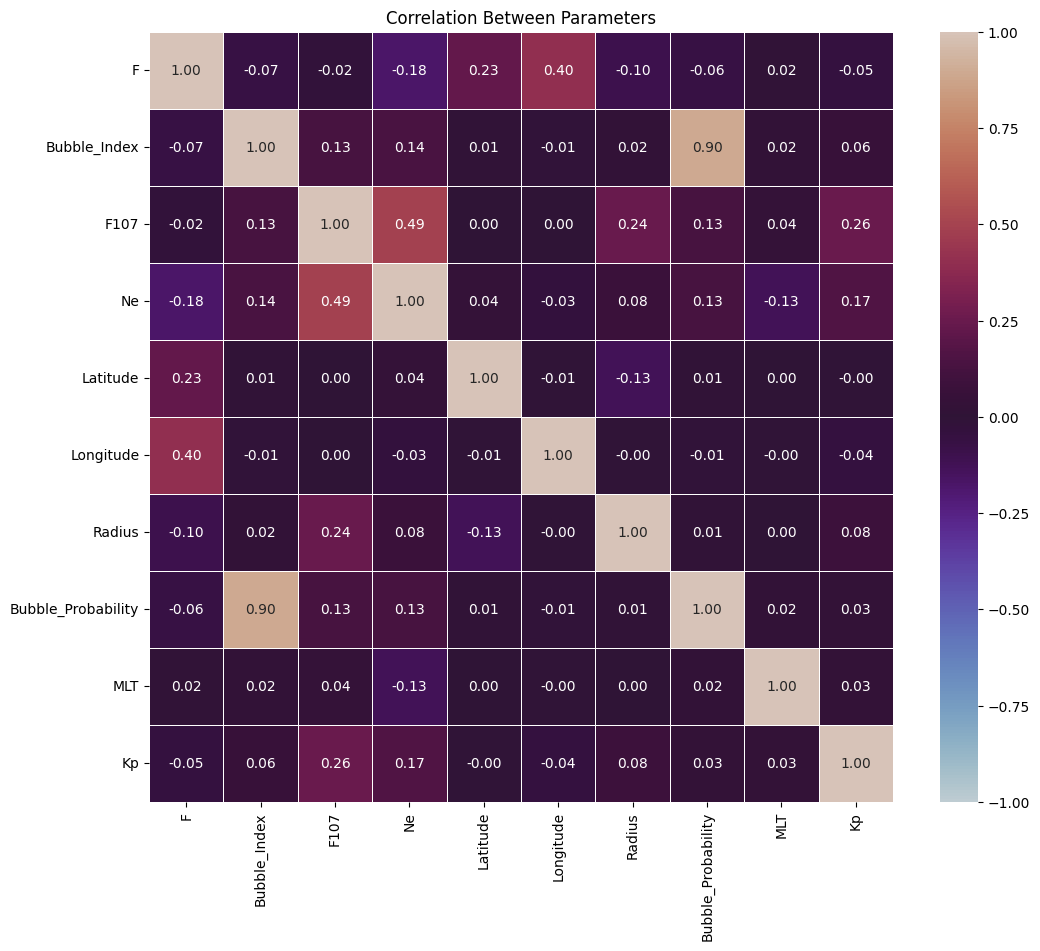

In [72]:
from matplotlib.pyplot import get_cmap
from matplotlib.colors import ListedColormap
grafik_heatmap = data.select_dtypes(include=np.number).columns
korelasi_data = data[grafik_heatmap].corr()

color = get_cmap('twilight')
color_cmap = ListedColormap(color(np.linspace(0.07, 0.93, 256)))

plt.figure(figsize=(12, 10))
sns.heatmap(korelasi_data, annot=True, cmap= color_cmap, fmt=".2f", vmin = -1, vmax = 1, linewidths = 0.5)
plt.title('Correlation Between Parameters')
plt.show()